# Práctica 3: Detectores centelladores con fotomultiplicadores

In [2]:
%pip install pandas matplotlib numpy scikit-learn scipy -q --root-user-action=ignore


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
from scipy.optimize import curve_fit
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

plt.style.use('seaborn-v0_8')

## Importando archivos de datos

In [4]:
bgo_cs_df = pd.read_csv('./data/BGO-137CsE2-5.csv', skiprows=21, usecols=['Channel', 'Counts'])
bgo_co_df = pd.read_csv('./data/BGO-60CoE2-5.csv', skiprows=21, usecols=['Channel', 'Counts'])
csi_cs_df = pd.read_csv('./data/CsI-137Cs-E5.csv', skiprows=21, usecols=['Channel', 'Counts'])
csi_co_df = pd.read_csv('./data/CsI-60Co-E5.csv', skiprows=21, usecols=['Channel', 'Counts'])

## Visualización de datos

### Fuente radioactiva de 60Co

#### Detector centellador CsI(Tl)

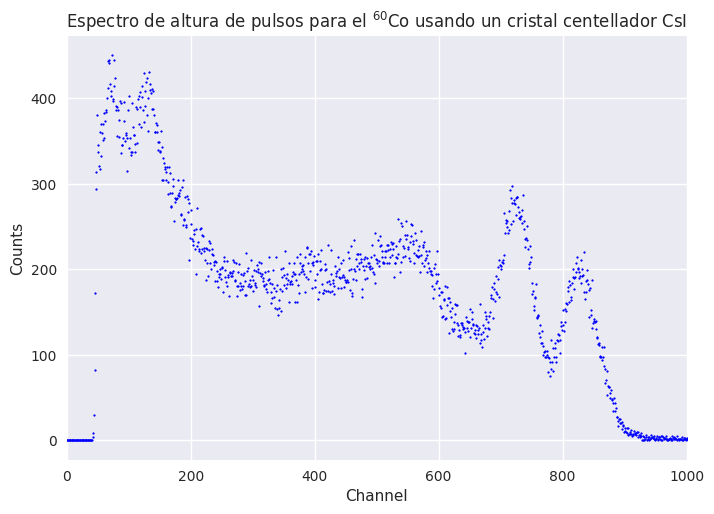

In [5]:
fig_CsI60Co, ax_CsI60Co = plt.subplots()

ax_CsI60Co.scatter(csi_co_df['Channel'], csi_co_df['Counts'], s=1.5, c='b')
ax_CsI60Co.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI')
ax_CsI60Co.set_xlabel('Channel')
ax_CsI60Co.set_ylabel('Counts')
ax_CsI60Co.set_xlim(0, 1000)
ax_CsI60Co.xaxis.set_major_locator(ticker.MultipleLocator(200))

#### Detector centellador BGO(BiGeO)

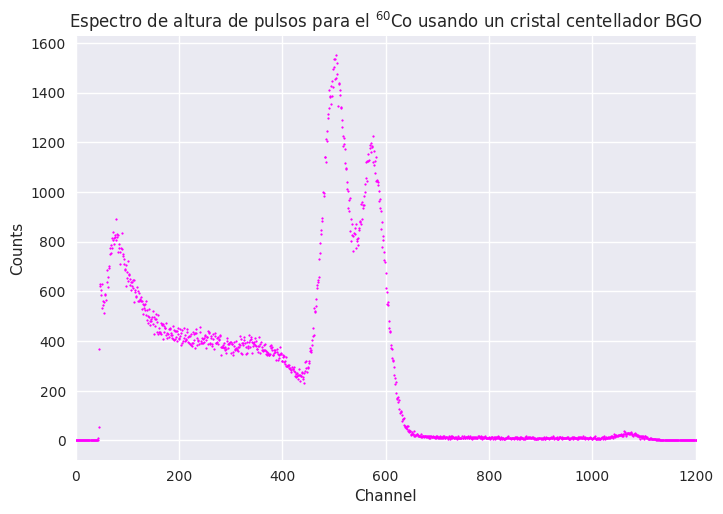

In [6]:
fig_BGO60Co, ax_BGO60Co = plt.subplots()

ax_BGO60Co.scatter(bgo_co_df['Channel'], bgo_co_df['Counts'], s=1.5, c='magenta')
ax_BGO60Co.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador BGO')
ax_BGO60Co.set_xlabel('Channel')
ax_BGO60Co.set_ylabel('Counts')
ax_BGO60Co.set_xlim(0, 1200)
ax_BGO60Co.xaxis.set_major_locator(ticker.MultipleLocator(200))

### Fuente radioactiva de 137Cs

#### Detector centellador CsI(Tl)

(0.0, 850.0)

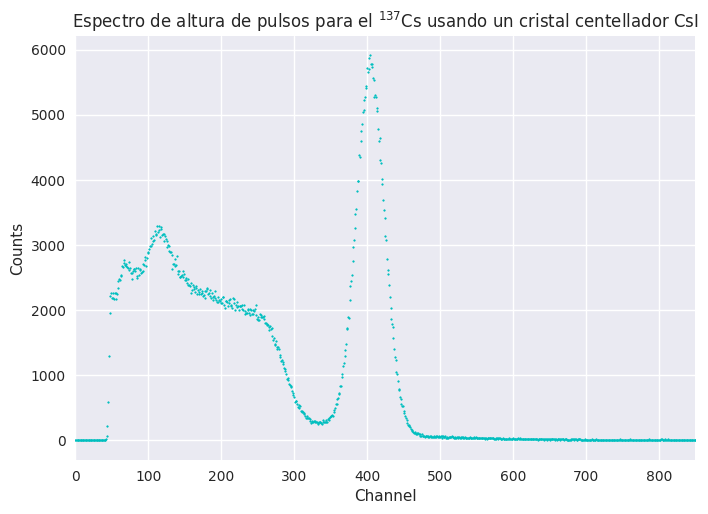

In [7]:
fig_CsI137Cs, ax_CsI137Cs = plt.subplots()

ax_CsI137Cs.scatter(csi_cs_df['Channel'], csi_cs_df['Counts'], s= 1.5, c='c')
ax_CsI137Cs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI')
ax_CsI137Cs.set_xlabel('Channel')
ax_CsI137Cs.set_ylabel('Counts')
ax_CsI137Cs.set_xlim(0, 850)

#### Detector centellador BGO(BiGeO)

(0.0, 650.0)

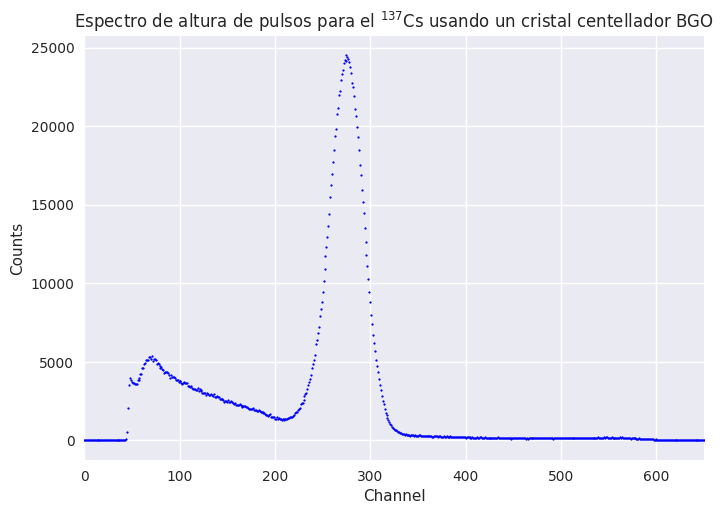

In [8]:
fig_BGO137Cs, ax_BGO137Cs = plt.subplots()

# BGO (BiGeO) with 137Cs radioactive source
ax_BGO137Cs.scatter(bgo_cs_df['Channel'], bgo_cs_df['Counts'], s= 1.5, c='b')
ax_BGO137Cs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador BGO')
ax_BGO137Cs.set_xlabel('Channel')
ax_BGO137Cs.set_ylabel('Counts')
ax_BGO137Cs.set_xlim(0, 650)

## Análisis de datos

### Calibración de energía del detector centellador CsI(Tl)

Para la calibración lineal en energía, necesitamos conocer el centroide de cada una de las distribuciones Gaussianas, $\textit{i. e.}$, el pico de la distribución. Para ello, utilizaremos la función `Peak Finder` del softaware `USX`.

| Isotope | Channel | Counts | Energy (keV) |
|---------|---------|--------|--------------|
|  137Cs  |   404   |  5910  |    661.657   |
|   60Cs  |   725   |   283  |   1173.228   |
|   60Cs  |   825   |   202  |   1332.492   |

In [9]:
csi_df = pd.DataFrame({'Channel': [404, 725, 825], 'Energy': [661.57, 1173.228, 1332.492]})
csi_df

,Channel,Energy
0,404,661.570
1,725,1173.228
2,825,1332.492


In [10]:
regr_csi = linear_model.LinearRegression()

In [11]:
regr_csi.fit(csi_df[['Channel']], csi_df['Energy'])

LinearRegression()

In [12]:
energy_pred_csi = regr_csi.predict(csi_df[['Channel']])

In [13]:
slope_csi = regr_csi.coef_[0]
intercept_csi = regr_csi.intercept_

print(f"Slope: {slope_csi:.4f}")
print(f"Intercept: {intercept_csi:.4f}")

Slope: 1.5937
Intercept: 17.7236


In [14]:
r2_csi = r2_score(csi_df['Energy'], energy_pred_csi)

print(fr"$r^2$ = {r2_csi}")

$r^2$ = 0.9999999752077676


In [15]:
line = lambda x, m, b : m * x + b

In [16]:
params_csi, covm_csi = curve_fit(line, csi_df['Channel'], csi_df['Energy'], p0=[1, 1])

In [44]:
err_csi = np.sqrt(np.diag(covm_csi))

print(fr"Slope: {params_csi[0]:.4f} $\pm$ {err_csi[0]:.7f}")
print(f"Intercept: {params_csi[1]:.4f} +- {err_csi[1]:.4f}")

Slope: 1.5937 $\pm$ 0.0002509
Intercept: 17.7236 +- 0.1695


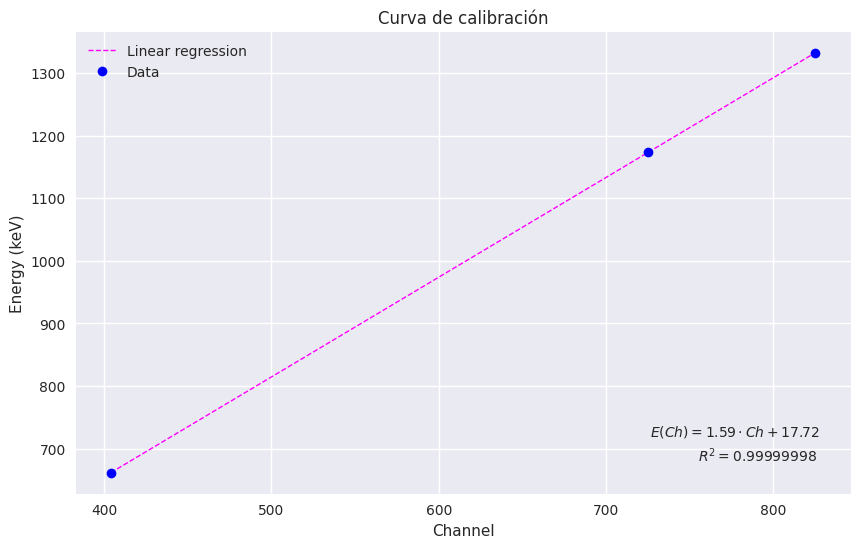

In [18]:
ChannelCsI = csi_df['Channel']
EnergyCsI = csi_df['Energy']

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ChannelCsI, energy_pred_csi, '--', c='magenta', label='Linear regression', lw=1)
ax.plot(ChannelCsI, EnergyCsI, 'bo', label='Data')
ax.annotate(
    fr'$E(Ch) = {slope_csi:.2f} \cdot Ch + {intercept_csi:.2f}$',
    xy=(726, 720)
)
ax.annotate(
    fr'$R^{2} = {r2_csi:.8f}$',
    xy=(755, 680)
)
plt.title("Curva de calibración")
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.legend()

#### Curva de calibración para el detector centellador CsI(Tl)

La curva de calibración es

$$
    E(\text{Ch}) = (1.5937 \pm 0.002509) \cdot \text{Ch} + (17.7236 \pm 0.1695)
$$

### Calibración de energía del detector centellador BGO(BiGeO)

Para la calibración lineal en energía, necesitamos conocer el centroide de cada una de las distribuciones Gaussianas, $\textit{i. e.}$, el pico de la distribución. Para ello, utilizaremos la función `Peak Finder` del softaware `USX`.

| Isotope | Channel | Counts | Energy (keV) |
|---------|---------|--------|--------------|
|   60Co  |   502   |  1457  |   1173.228   |
|   60Co  |   572   |  1160  |   1332.492   |
|  137Cs  |   272   |  24167 |    661.657   |

In [19]:
bgo_df = pd.DataFrame({'Channel': [502, 572, 272], 'Energy': [1173.228, 1332.492, 661.657]})
bgo_df

,Channel,Energy
0,502,1173.228
1,572,1332.492
2,272,661.657


In [20]:
regr_bgo = linear_model.LinearRegression()

In [21]:
regr_bgo.fit(bgo_df[['Channel']], bgo_df['Energy'])

LinearRegression()

In [22]:
energy_pred_bgo = regr_bgo.predict(bgo_df[['Channel']])

In [23]:
slope_bgo = regr_bgo.coef_[0]
intercept_bgo = regr_bgo.intercept_

print(f"Slope: {slope_bgo:.4f}")
print(f"Intercept: {intercept_bgo:.4f}")

Slope: 2.2332
Intercept: 53.8501


In [24]:
r2_bgo = r2_score(bgo_df['Energy'], energy_pred_bgo)

print(fr"$r^2$ = {r2_bgo}")

$r^2$ = 0.9999814498094657


In [25]:
params_bgo, covm_bgo = curve_fit(line, bgo_df['Channel'], bgo_df['Energy'], p0=[1, 1])

In [45]:
err_bgo = np.sqrt(np.diag(covm_bgo))

print(fr"Slope: {params_bgo[0]:.4f} $\pm$ {err_bgo[0]:.6f}")
print(f"Intercept: {params_bgo[1]:.4f} +- {err_bgo[1]:.4f}")

Slope: 2.2332 $\pm$ 0.009618
Intercept: 53.8501 +- 4.4880


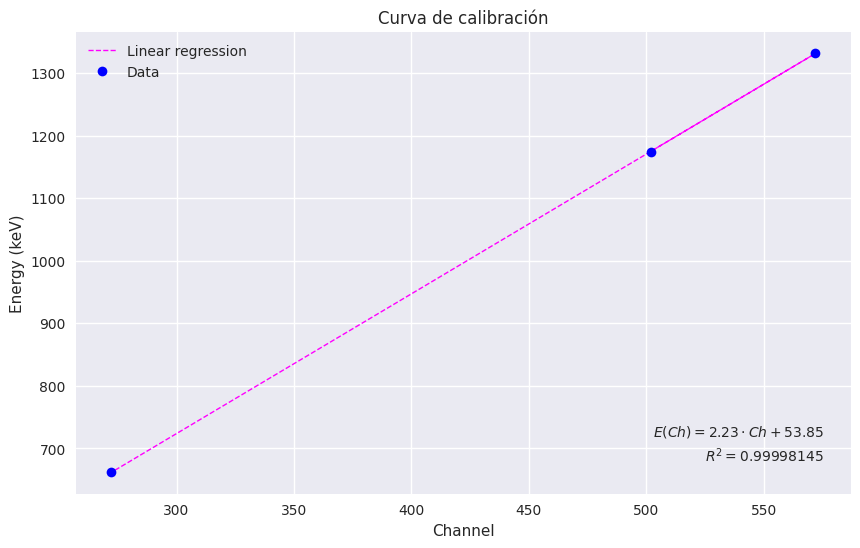

In [27]:
ChannelCal = bgo_df['Channel']
EnergyCal = bgo_df['Energy']

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ChannelCal, energy_pred_bgo, '--', c='magenta', label='Linear regression', lw=1)
ax.plot(ChannelCal, EnergyCal, 'bo', label='Data')
ax.annotate(
    fr'$E(Ch) = {slope_bgo:.2f} \cdot Ch + {intercept_bgo:.2f}$',
    xy=(503, 720)
)
ax.annotate(
    fr'$R^{2} = {r2_bgo:.8f}$',
    xy=(525, 680)
)
plt.title("Curva de calibración")
plt.xlabel("Channel")
plt.ylabel("Energy (keV)")
plt.legend()

#### Curva de calibración para el detector centellador BGO (BiGeO)

La curva de calibración es

$$
    E(\text{Ch}) = (2.2332 \pm 0.009618) \cdot \text{Ch} + (53.8501 \pm 4.4880)
$$

## Espectros de energía

### Detector centellador CsI(Tl)

#### Fuente radioactiva de 60Co

(0.0, 2400.0)

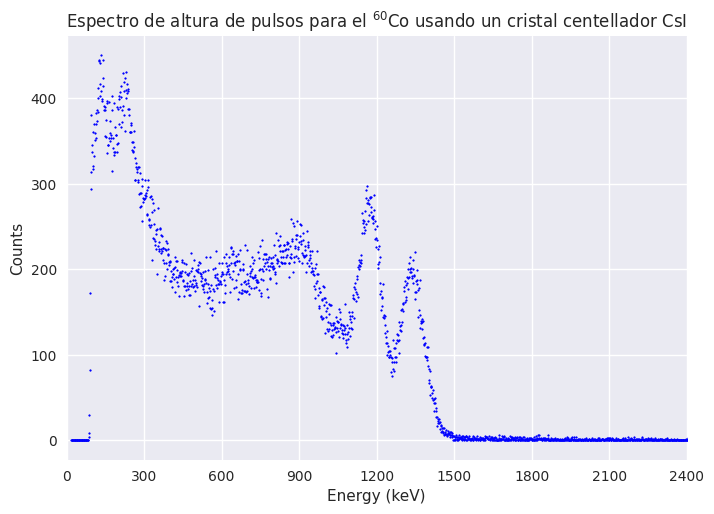

In [28]:
csi_co_df['Energy'] = line(csi_co_df['Channel'], slope_csi, intercept_csi)
EnergyCsICo = csi_co_df['Energy']
CountsCsICo = csi_co_df['Counts']

fig_energy_CsICo, ax_energy_CsICo = plt.subplots()
# ax_energy_CsICo.plot(EnergyCsICo, CountsCsICo, 'b', mfc='k', lw=1)
ax_energy_CsICo.scatter(EnergyCsICo, CountsCsICo, s= 1.5, c='b')
ax_energy_CsICo.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI')
ax_energy_CsICo.set_xlabel('Energy (keV)')
ax_energy_CsICo.set_ylabel('Counts')
ax_energy_CsICo.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_CsICo.set_xlim(0, 2400)

#### Fuente radioactiva de 137Cs

(0.0, 1500.0)

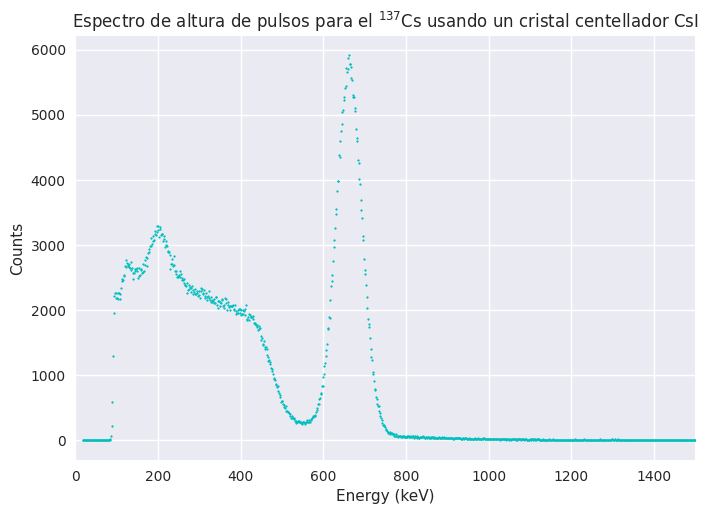

In [29]:
csi_cs_df['Energy'] = line(csi_cs_df['Channel'], slope_csi, intercept_csi)
EnergyCsICs = csi_cs_df['Energy']
CountsCsICs = csi_cs_df['Counts']

fig_energy_CsICs, ax_energy_CsICs = plt.subplots()
# ax_energy_CsICs.plot(EnergyCsICs, CountsCsICs, 'b', mfc='k', lw=1)
ax_energy_CsICs.scatter(EnergyCsICs, CountsCsICs, s= 1.5, c='c')
ax_energy_CsICs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI')
ax_energy_CsICs.set_xlabel('Energy (keV)')
ax_energy_CsICs.set_ylabel('Counts')
# ax_energy_CsICs.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_CsICs.set_xlim(0, 1500)

### Detector centellador BGO (BiGeO)

#### Fuente radioactiva de 60Co

(0.0, 2400.0)

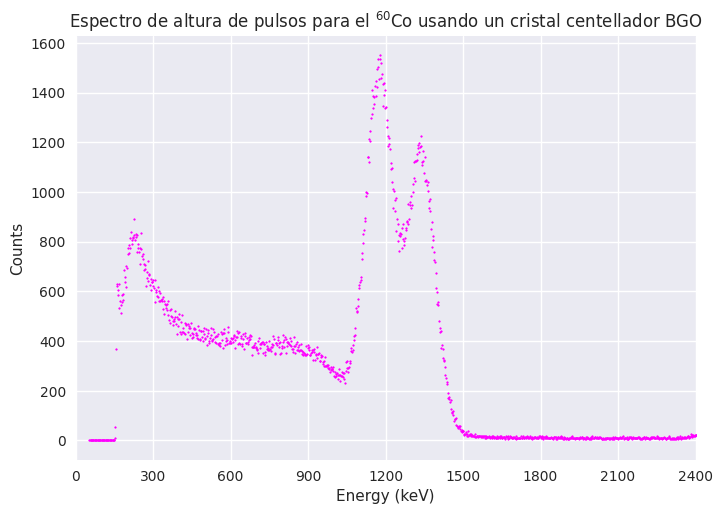

In [30]:
bgo_co_df['Energy'] = line(bgo_co_df['Channel'], slope_bgo, intercept_bgo)
EnergyBGOCo = bgo_co_df['Energy']
CountsBGOCo = bgo_co_df['Counts']

fig_energy_BGOCo, ax_energy_BGOCo = plt.subplots()
# ax_energy_BGOCo.plot(EnergyBGOCo, CountsBGOCo, 'b', mfc='k', lw=1)
ax_energy_BGOCo.scatter(EnergyBGOCo, CountsBGOCo, s= 1.5, c='magenta')
ax_energy_BGOCo.set_title(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador BGO')
ax_energy_BGOCo.set_xlabel('Energy (keV)')
ax_energy_BGOCo.set_ylabel('Counts')
ax_energy_BGOCo.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_BGOCo.set_xlim(0, 2400)

#### Fuente radioactiva de 137Cs

(0.0, 1600.0)

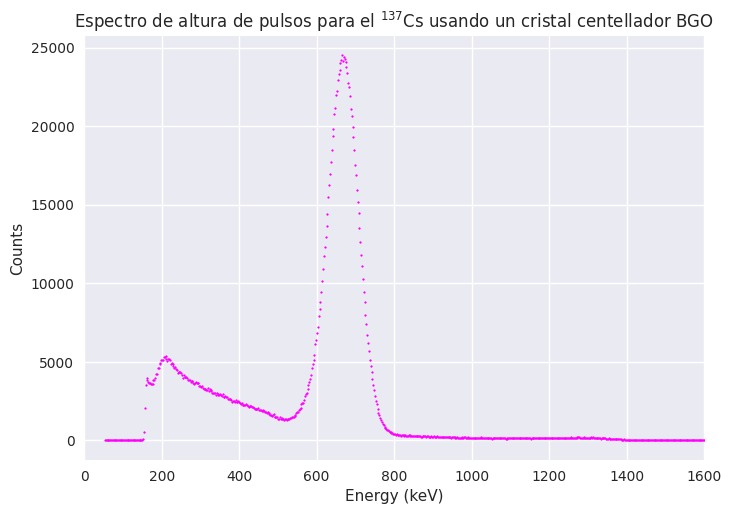

In [31]:
bgo_cs_df['Energy'] = line(bgo_cs_df['Channel'], slope_bgo, intercept_bgo)
EnergyBGOCs = bgo_cs_df['Energy']
CountsBGOCs = bgo_cs_df['Counts']

fig_energy_BGOCs, ax_energy_BGOCs = plt.subplots()
# ax_energy_BGOCs.plot(EnergyBGOCs, CountsBGOCs, 'b', mfc='k', lw=1)
ax_energy_BGOCs.scatter(EnergyBGOCs, CountsBGOCs, s= 1.5, c='magenta')
ax_energy_BGOCs.set_title(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador BGO')
ax_energy_BGOCs.set_xlabel('Energy (keV)')
ax_energy_BGOCs.set_ylabel('Counts')
# ax_energy_BGOCs.xaxis.set_major_locator(ticker.MultipleLocator(300))
ax_energy_BGOCs.set_xlim(0, 1600)

## Ajuste de distribuciones Gaussianas

Puesto que deseamos conocer la resolución de cada uno de los detectores, es necesario ajustar las distribuciones Gaussianas de cada uno de los picos de energía.

Recordemos que la forma general de una Gaussiana es:

$$
    G(x, A, \mu, \sigma) = A \text{e}^{-\frac{1}{2}\left(\frac{x - \mu}{\sigma}\right)^{2}},
$$

donde $A = \frac{1}{\sqrt{2\pi} \cdot \sigma}$.

In [32]:
G = lambda x, A, mu, sigma: A * np.exp(- pow(x - mu, 2) / (2 * pow(sigma, 2)))

### Detector centellador CsI(Tl)

#### Fuente radioactiva de 60Co

##### Primer pico energético
Realizamos el ajuste a la primer distribución Gaussiana, que aproximandamente tiene un pico en $1175$ keV.

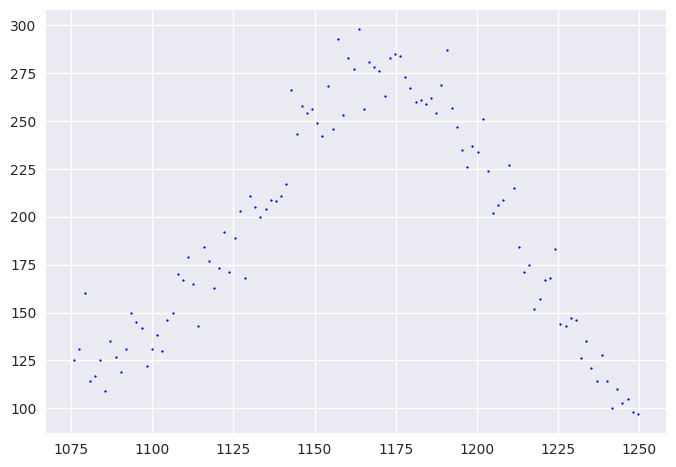

In [33]:
co_mu1_df = csi_co_df[(csi_co_df['Energy'] > 1075) & (csi_co_df['Energy'] < 1250)]
coEnergy1 = co_mu1_df['Energy']
coCounts1 = co_mu1_df['Counts']

plt.scatter(coEnergy1, coCounts1, s= 1.5, c='b')

In [34]:
poptCsICo1, pcovCsICo1 = curve_fit(G, coEnergy1, coCounts1, p0=[300, 1175, 1])

print(f"Párametros del ajuste: {poptCsICo1}")
print(f"Matriz de covarianza\n {pcovCsICo1}")

Párametros del ajuste: [ 265.64745962 1166.67306693   58.99134624]
Matriz de covarianza
 [[10.11271515 -0.08739414 -2.29817519]
 [-0.08739414  0.72951096  0.07075055]
 [-2.29817519  0.07075055  1.26608636]]


In [35]:
coCsIError1 = np.sqrt(np.diag(pcovCsICo1))
centroidCsICo1 = poptCsICo1[1]

print("Incertidumbres de los parámetros:")
print(f"A: {poptCsICo1[0]:.2f} ± {coCsIError1[0]:.2f}")
print(f"μ: {poptCsICo1[1]:.2f} ± {coCsIError1[1]:.2f}")
print(f"σ: {poptCsICo1[2]:.2f} ± {coCsIError1[2]:.2f}")

Incertidumbres de los parámetros:
A: 265.65 ± 3.18
μ: 1166.67 ± 0.85
σ: 58.99 ± 1.13


##### Segundo pico energético

Ahora realizamos un ajuste del segundo pico, que aproximandamente se encuentra en $1300$ keV.

(0.0, 250.0)

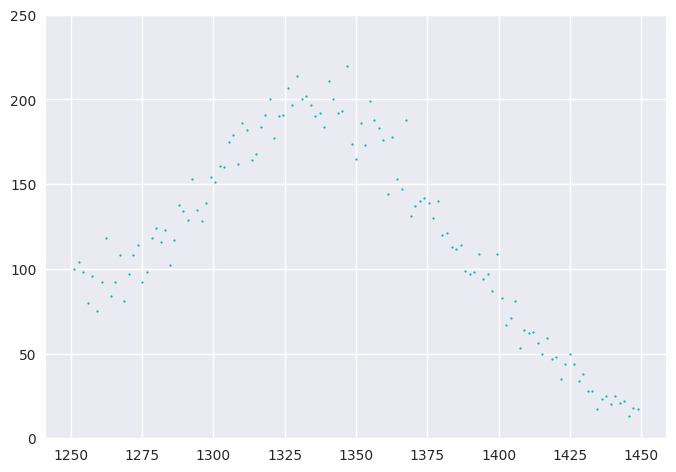

In [36]:
co_mu2_df = csi_co_df[(csi_co_df['Energy'] > 1250) & (csi_co_df['Energy'] < 1450)]
coEnergy2 = co_mu2_df['Energy']
coCounts2 = co_mu2_df['Counts']

plt.scatter(coEnergy2, coCounts2, s= 1.5, c='c')
plt.ylim(0, 250)

In [37]:
poptCsICo2, pcovCsICo2 = curve_fit(G, coEnergy2, coCounts2, p0=[220, 1330, 1])

print(f"Párametros del ajuste: {poptCsICo2}")
print(f"Matriz de covarianza\n {pcovCsICo2}")

Párametros del ajuste: [ 193.19021665 1331.64559395   53.31071823]
Matriz de covarianza
 [[ 4.53349956  0.11331819 -1.03478259]
 [ 0.11331819  0.49514033 -0.09767305]
 [-1.03478259 -0.09767305  0.63690856]]


In [38]:
coCsIError2 = np.sqrt(np.diag(pcovCsICo2))
centroidCsICo2 = poptCsICo2[1]

print("Incertidumbres de los parámetros:")
print(f"A: {poptCsICo2[0]:.2f} ± {coCsIError2[0]:.2f}")
print(f"μ: {poptCsICo2[1]:.2f} ± {coCsIError2[1]:.2f}")
print(f"σ: {poptCsICo2[2]:.2f} ± {coCsIError2[2]:.2f}")

Incertidumbres de los parámetros:
A: 193.19 ± 2.13
μ: 1331.65 ± 0.70
σ: 53.31 ± 0.80


Text(0.5, 0.98, 'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI')

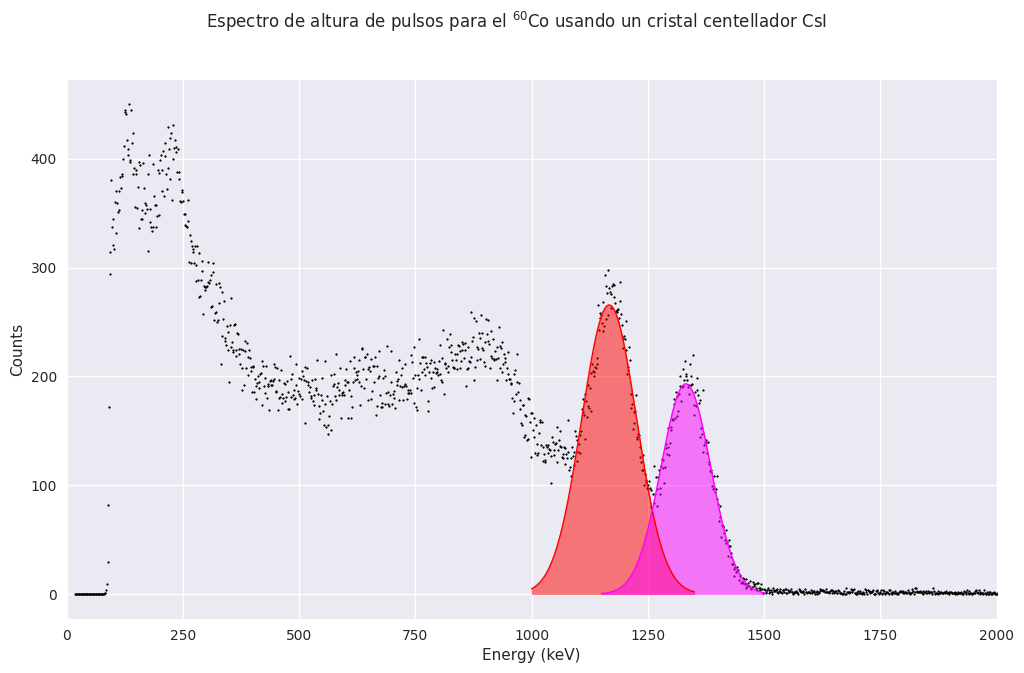

In [39]:
coCsiEnergyModel1 = np.linspace(1000, 1350, 1000)
coCsiEnergyModel2 = np.linspace(1150, 1500, 1000)

fig_CsICo, ax_CsICo = plt.subplots(figsize=(12, 7))
ax_CsICo.scatter(csi_co_df['Energy'], csi_co_df['Counts'], s= 1.5, c='k')
ax_CsICo.plot(coCsiEnergyModel1, G(coCsiEnergyModel1, *poptCsICo1), 'r', lw=1)
ax_CsICo.plot(coCsiEnergyModel2, G(coCsiEnergyModel2, *poptCsICo2), 'magenta', lw=1)
ax_CsICo.fill_between(coCsiEnergyModel1, G(coCsiEnergyModel1, *poptCsICo1), color='r', alpha=0.5)
ax_CsICo.fill_between(coCsiEnergyModel2, G(coCsiEnergyModel2, *poptCsICo2), color='magenta', alpha=0.5)
ax_CsICo.set_xlim(0, 2000)
ax_CsICo.set_xlabel('Energy (keV)')
ax_CsICo.set_ylabel('Counts')

fig_CsICo.suptitle(r'Espectro de altura de pulsos para el ${}^{60}$Co usando un cristal centellador CsI')

#### Fuente radioactiva de 137Cs

Realizamos el ajuste a la distribución Gaussiana, cuyo pico se encuentra aproximandamente en $650$ keV.

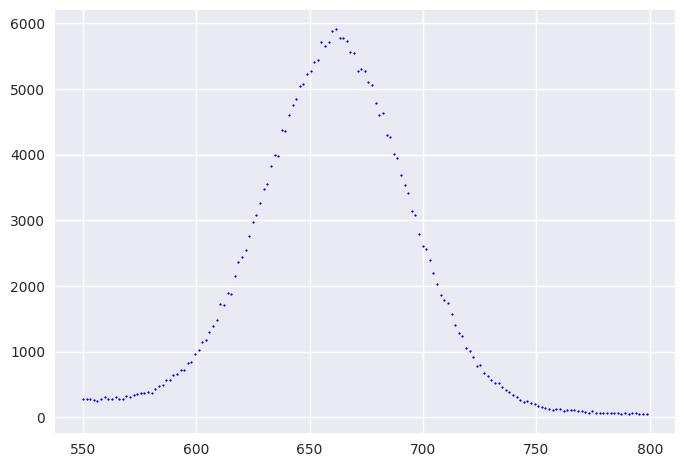

In [40]:
cs_mu_df = csi_cs_df[(csi_cs_df['Energy'] > 550) & (csi_cs_df['Energy'] < 800)]
csEnergy = cs_mu_df['Energy']
csCounts = cs_mu_df['Counts']

plt.scatter(csEnergy, csCounts, s= 1.5, c='b')

In [41]:
poptCsICs, pcovCsICs = curve_fit(G, csEnergy, csCounts, p0=[6000, 650, 1])

print(f"Párametros del ajuste: {poptCsICs}")
print(f"Matriz de covarianza\n {pcovCsICs}")

Párametros del ajuste: [5656.5612762   661.10326207   32.1342343 ]
Matriz de covarianza
 [[ 5.30960403e+02  7.19494922e-05 -2.01106868e+00]
 [ 7.19494922e-05  2.28468376e-02 -8.83691646e-07]
 [-2.01106868e+00 -8.83691646e-07  2.28496762e-02]]


In [42]:
csCsIError = np.sqrt(np.diag(pcovCsICs))
centroidCsICs = poptCsICs[1]

print("Incertidumbres de los parámetros:")
print(f"A: {poptCsICs[0]:.2f} ± {csCsIError[0]:.2f}")
print(f"μ: {poptCsICs[1]:.2f} ± {csCsIError[1]:.2f}")
print(f"σ: {poptCsICs[2]:.2f} ± {csCsIError[2]:.2f}")

Incertidumbres de los parámetros:
A: 5656.56 ± 23.04
μ: 661.10 ± 0.15
σ: 32.13 ± 0.15


Text(0.5, 0.98, 'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI')

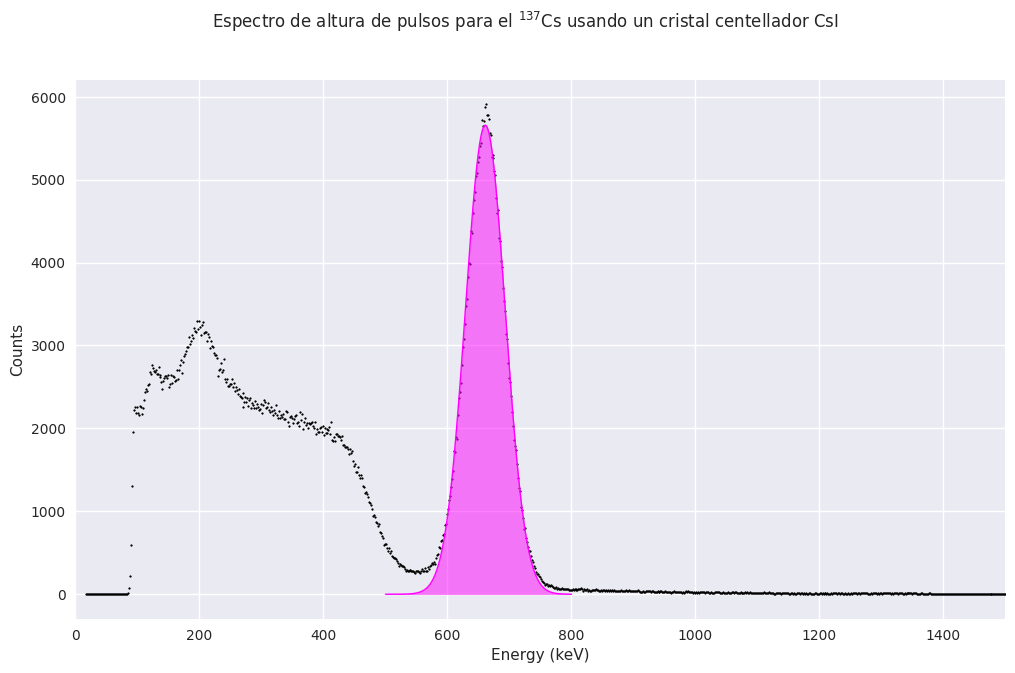

In [43]:
csCsiEnergyModel = np.linspace(500, 800, 1000)

fig_CsICs, ax_CsIcS = plt.subplots(figsize=(12, 7))
ax_CsIcS.scatter(csi_cs_df['Energy'], csi_cs_df['Counts'], s= 1.5, c='k')
ax_CsIcS.plot(csCsiEnergyModel, G(csCsiEnergyModel, *poptCsICs), 'magenta', lw=1)
ax_CsIcS.fill_between(csCsiEnergyModel, G(csCsiEnergyModel, *poptCsICs), color='magenta', alpha=0.5)
ax_CsIcS.set_xlim(0, 1500)
ax_CsIcS.set_xlabel('Energy (keV)')
ax_CsIcS.set_ylabel('Counts')

fig_CsICs.suptitle(r'Espectro de altura de pulsos para el ${}^{137}$Cs usando un cristal centellador CsI')